## Project Objectives:

Using 20 news groups dataset of scikit learn for
- Tokenizing corpus and perform part-of-speech tagging on it.
- Applying techniques (Frequency with filter, PMI, T-test with filter and Chi-Sq test) to extract bigram collocations from the corpus and comparing these techniques. 
- Applying SVM (3 different kernals) and multinomial naive bayes.
- Comparing accuracy of SVM and NB.

In [1]:
#import libraries
import nltk
from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.collocations import *
from sklearn.model_selection import GridSearchCV
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import pandas as pd
import scikitplot as sciplt
from nltk.stem.snowball import SnowballStemmer

In [2]:
stemmer = SnowballStemmer("english", ignore_stopwords=True)
#initialize array of stop words
stop_words=set(stopwords.words("english"))
#pick four categories
categories = ['alt.atheism', 'talk.religion.misc','comp.graphics','sci.space']
#fetch all newsgroups data from 4 categories and remove unnecessary data including headers, footers and quotes
newsgroups = fetch_20newsgroups(categories=categories,subset='all',shuffle=True,remove=('headers', 'footers', 'quotes'))


#### a) Tokenizing Corpus and Performing POS Tagging

In [3]:
#cleaning data for bigram collocations
filteredWords = []
index=0
for news in newsgroups.data:
    #retain only alphabetical data (remove numbers and special characters)
    newsgroups.data[index] = re.sub(r"[^a-zA-Z]+", ' ',news)
    #convert news to lower case
    newsgroups.data[index] = newsgroups.data[index].lower() 
    #remove stop words
    newsgroups.data[index] = ' '.join([word for word in newsgroups.data[index].split() if word not in stop_words]) 
    tokenized_words=word_tokenize(newsgroups.data[index])
    for word in tokenized_words:
        filteredWords.append(word)
    index=index+1

In [4]:
tagged_words = nltk.pos_tag(filteredWords)

#### b) Applying the techniques (Frequency with filter, PMI, T-test with filter, Chi-Sq test) 

In [5]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(filteredWords)
scored_words_pmi = finder.score_ngrams(bigram_measures.pmi)

# create dataframe and sort tuple on basis of score in descending order
dfPMI = pd.DataFrame(
            list(scored_words_pmi), 
            columns=['bigram','pmi']).sort_values(by='pmi', ascending=False)[0:20].reset_index(drop=True)
dfPMI[0:20]

,bigram,pmi
0,"(aatdb, arabidopsis)",18.501161
1,"(planetenproject, programmeert)",18.501161
2,"(perfecetly, reasoable)",18.501161
3,"(pepvax, pepperdine)",18.501161
4,"(pentacost, hymn)",18.501161
5,"(pelletized, ceramic)",18.501161
6,"(pekka, himanen)",18.501161
7,"(peacefully, enjoin)",18.501161
8,"(patrimony, zorastrian)",18.501161
9,"(passel, sterile)",18.501161


In [6]:
finder = BigramCollocationFinder.from_words(filteredWords)
finder.apply_freq_filter(5)
scored_words_rawFreq = finder.score_ngrams(bigram_measures.raw_freq)

# create dataframe and sort tuple on basis of score in descending order
dfFreq = pd.DataFrame(
            list(scored_words_rawFreq), 
            columns=['bigram','raw_freq']).sort_values(by='raw_freq', ascending=False)[0:20].reset_index(drop=True)
dfFreq[0:20]

,bigram,raw_freq
0,"(can, not)",0.000539
1,"(e, mail)",0.000509
2,"(nasa, gov)",0.000388
3,"(image, processing)",0.000348
4,"(anonymous, ftp)",0.000345
5,"(would, like)",0.000345
6,"(tar, z)",0.000315
7,"(computer, graphics)",0.000310
8,"(p, p)",0.000310
9,"(edu, pub)",0.000261


In [7]:
finder = BigramCollocationFinder.from_words(filteredWords)
scored_words_chiSq = finder.score_ngrams(bigram_measures.chi_sq)

# create dataframe and sort tuple on basis of score in descending order
dfChiSq = pd.DataFrame(
            list(scored_words_chiSq), 
            columns=['bigram','chi_sq']).sort_values(by='chi_sq', ascending=False)[0:20].reset_index(drop=True)
dfChiSq[0:20]

,bigram,chi_sq
0,"(aatdb, arabidopsis)",371026.0
1,"(paronoid, moromn)",371026.0
2,"(papsttums, droemer)",371026.0
3,"(pacman, visicalc)",371026.0
4,"(overige, sprekers)",371026.0
5,"(overbearing, totalitarianists)",371026.0
6,"(oveo, vegetarians)",371026.0
7,"(outgassing, breakup)",371026.0
8,"(outcasts, mainline)",371026.0
9,"(othe, optimisations)",371026.0


In [8]:
finder = BigramCollocationFinder.from_words(filteredWords)
finder.apply_freq_filter(5)
scored_words_studentt = finder.score_ngrams(bigram_measures.student_t)

# create dataframe and sort tuple on basis of score in descending order
dft = pd.DataFrame(
        list(scored_words_studentt), 
        columns=['bigram','t']).sort_values(by='t', ascending=False)[0:20].reset_index(drop=True)
dft[0:20]

,bigram,t
0,"(can, not)",14.134512
1,"(e, mail)",13.689872
2,"(nasa, gov)",11.971926
3,"(anonymous, ftp)",11.295238
4,"(image, processing)",11.293889
5,"(tar, z)",10.805328
6,"(would, like)",10.729529
7,"(computer, graphics)",10.644014
8,"(p, p)",10.600301
9,"(edu, pub)",9.721684


#### c) Checking the overlap among techniques

The PMI and chi-square yield better result, and their values are quite same. Also, t_test and raw_frequecy techniques has shown quite same results.

#### Do you think it makes sense to consider the union of the results?

We can take union of these techniques to take benifit from diverse results. For instance, the PMI technique works on probablity of word co-occurrences while raw_frequence technique works on frequency of occurrences. Taking union of results of both techniques will make collocations more effective.  



In [9]:
#create a new dataframe and checking overlapping (common) values
bigramResult=pd.DataFrame()
bigramResult['PMI']=dfPMI['bigram']
bigramResult['Chi_sq']=dfChiSq['bigram']
bigramResult['student_t (t_test)']=dft['bigram']
bigramResult['raw_frequency']=dfFreq['bigram']

bigramResult[0:20]

,PMI,Chi_sq,student_t (t_test),raw_frequency
0,"(aatdb, arabidopsis)","(aatdb, arabidopsis)","(can, not)","(can, not)"
1,"(planetenproject, programmeert)","(paronoid, moromn)","(e, mail)","(e, mail)"
2,"(perfecetly, reasoable)","(papsttums, droemer)","(nasa, gov)","(nasa, gov)"
3,"(pepvax, pepperdine)","(pacman, visicalc)","(anonymous, ftp)","(image, processing)"
4,"(pentacost, hymn)","(overige, sprekers)","(image, processing)","(anonymous, ftp)"
5,"(pelletized, ceramic)","(overbearing, totalitarianists)","(tar, z)","(would, like)"
6,"(pekka, himanen)","(oveo, vegetarians)","(would, like)","(tar, z)"
7,"(peacefully, enjoin)","(outgassing, breakup)","(computer, graphics)","(computer, graphics)"
8,"(patrimony, zorastrian)","(outcasts, mainline)","(p, p)","(p, p)"
9,"(passel, sterile)","(othe, optimisations)","(edu, pub)","(edu, pub)"


### 2) SVM and NB for Text Classification

#### a) Cleaning the text (removal of stopwords, number and non-letter characters) and Stemming

In [10]:
index=0
for news in newsgroups.data:
    #retain only alphabetical data (remove numbers and non letter characters)
    newsgroups.data[index] = re.sub(r"[^a-zA-Z]+", ' ',news)
    #convert news to lower case
    newsgroups.data[index] = newsgroups.data[index].lower() 
    #remove stop words
    newsgroups.data[index] = ' '.join([word for word in newsgroups.data[index].split() if word not in stop_words])
    #stem the words
    newsgroups.data[index] = ' '.join([stemmer.stem(word) for word in newsgroups.data[index].split()])
    index=index+1

#### b) Converting the corpus into a bag-of-words tf-idf weighted vector representation

In [11]:
#Converting corpus into tfidf
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(newsgroups.data)
sizeOfVocabularyBefore = len(tfidf_vectorizer.vocabulary_)

#### c) Spliting the data randomly into training and testing set

In [12]:
#split data in 30% Test and 70% Train
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf,newsgroups.target, test_size=0.3,random_state=42)

#### Training SVM and Reporting confusion matrix
##### Choice of Hyperparameters
For finding optimal hyperparameters, grid search is used. The reasons for hyperparameter range selection is mentioned below. 
- In sigmoid and rbf kernel, i have set gamma between 1e-2 and 1e-4. Gamma parameter is only used for non-linear hyperplanes, therefore it is not considered for linear kernal. When the gamma value increases, the training data points has more influence on decision boundary and may result in overfitting. I have set the range of gamma in negative exponential values to prevent overfitting.
- In sigmoid, linear and rbf kernel, there are different range of 'C' parameters were passed. The 'C' parameters tune model to avoid misclassification.  The greater the value of 'C' then smaller margin in hyperplane will be accepted. Contrarily, the lower value of 'C' results in the larger margin, but it will cost the accuracy [2].
- In Multinomial NB, alpha and fit-prior parameters are used. The alpha is smoothing parameter which controls the form of model and the value is set within range of 0.1 and 2. The other parameter fit-prior is a boolean parameter which is used to decide whether to learn class probablities or not [3].

Accuracy : 80.92428711897739
Confusion Matrix : 
 [[162   4  21  37]
 [  4 268  25   0]
 [ 13  10 280   4]
 [ 44   4  28 113]]


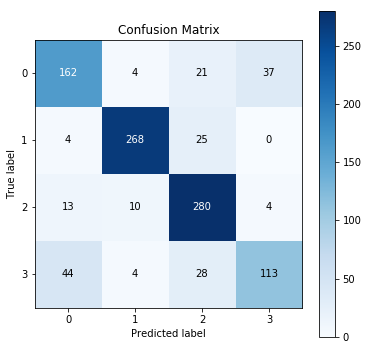

In [13]:
#I am using gridsearch to find the optimal hyperparameters
grid_param={'C':[5,10,100,500,1000],'kernel':['linear']}
clf_svm_linear = GridSearchCV(SVC(kernel='linear'),param_grid=grid_param,cv=5,n_jobs=-1)
clf_svm_linear.fit(X_train, y_train)
predicted_svm_linear = clf_svm_linear.predict(X_test)

accuracy_linear_before = np.mean(predicted_svm_linear == y_test)*100
print("Accuracy : "+str((np.mean(predicted_svm_linear == y_test)*100))) 
print("Confusion Matrix : \n", metrics.confusion_matrix(y_test, predicted_svm_linear))

sciplt.metrics.plot_confusion_matrix(y_test,predicted_svm_linear,figsize=(6,6))

Accuracy : 81.21927236971484
Confusion Matrix : 
 [[165   5  20  34]
 [  5 271  21   0]
 [  9  15 280   3]
 [ 52   5  22 110]]


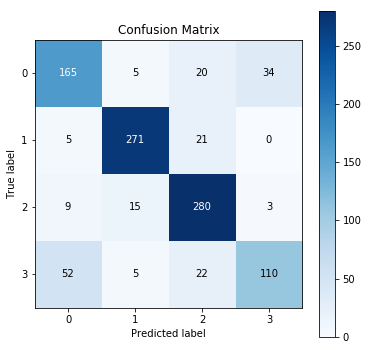

In [14]:
grid_param={'gamma': [1e-2,1e-3,1e-4],'C':[100,500,1000],'kernel':['sigmoid']}
clf_svm_sigmoid = GridSearchCV(SVC(kernel='sigmoid'),param_grid=grid_param,cv=5,n_jobs=-1)
clf_svm_sigmoid.fit(X_train, y_train)
predicted_svm_sigmoid = clf_svm_sigmoid.predict(X_test)

accuracy_sigmoid_before = np.mean(predicted_svm_sigmoid == y_test)*100
print("Accuracy : "+str((np.mean(predicted_svm_sigmoid == y_test)*100))) 
print("Confusion Matrix : \n", metrics.confusion_matrix(y_test, predicted_svm_sigmoid))

sciplt.metrics.plot_confusion_matrix(y_test,predicted_svm_sigmoid,figsize=(6,6))

Accuracy : 81.31760078662734
Confusion Matrix : 
 [[164   4  17  39]
 [  4 271  22   0]
 [ 13  13 276   5]
 [ 46   4  23 116]]


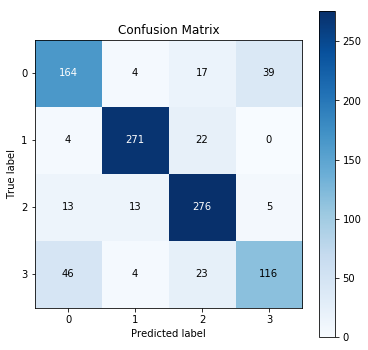

In [15]:
grid_param={'C':[100],'gamma':[1e-2],'kernel':['rbf']}
clf_svm_rbf = GridSearchCV(SVC(kernel='rbf'),param_grid=grid_param,cv=5,n_jobs=-1)
clf_svm_rbf.fit(X_train, y_train)
predicted_svm_rbf = clf_svm_rbf.predict(X_test)

accuracy_rbf_before = np.mean(predicted_svm_rbf == y_test)*100
print("Accuracy : "+str((np.mean(predicted_svm_rbf == y_test)*100))) 
print("Confusion Matrix : \n", metrics.confusion_matrix(y_test, predicted_svm_rbf))

sciplt.metrics.plot_confusion_matrix(y_test,predicted_svm_rbf,figsize=(6,6))

#### Training Multinomial NB and report confusion matrix

Accuracy : 84.070796460177
Confusion Matrix : 
 [[179   3   5  37]
 [ 12 279   4   2]
 [ 23  17 260   7]
 [ 41   5   6 137]]


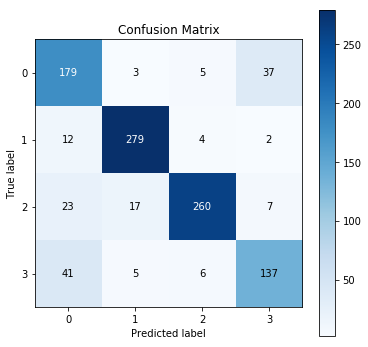

In [16]:
grid_param={'alpha':np.linspace(0.1,2,num=10),'fit_prior':[True,False]}
clf_nb = GridSearchCV(MultinomialNB(),param_grid=grid_param,cv=5,n_jobs=-1)
clf_nb.fit(X_train,y_train)
predicted_nb = clf_nb.predict(X_test)

accuracy_nb_before = np.mean(predicted_nb == y_test)*100
print("Accuracy : "+str((np.mean(predicted_nb == y_test)*100))) 
print("Confusion Matrix : \n", metrics.confusion_matrix(y_test, predicted_nb))

sciplt.metrics.plot_confusion_matrix(y_test,predicted_nb,figsize=(6,6))

#### Which algorithm has higher accuracy and why? 
Multonomial Naive Bayes (MNB) has shown highest accuracy of 84.07%. One reason that MNB is performing better is due to size documents. MNB works well with snippets datasets, which contains documents with lesser number of words. While SVMs tend to work well with full review datasets [1].  
#### Does changing the kernel of the SVM change the accuracy or decrease confusion between classes?
The linear and sigmoid kernals has shown accuracy of 80.92% and 81.21% respectively. When switched to RBF kernal, the accuracy slightly increased accuracy to 81.31%. The RBF kernel performed better than Linear and Sigmoid, also there is slight decrease in confusion between classes in RBF kernel. 

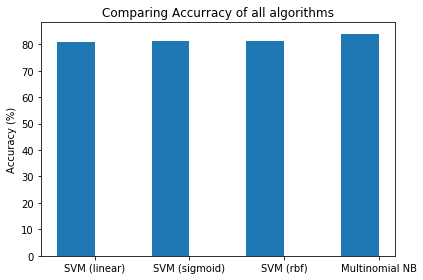

In [17]:
#Plotting accuracies of all algorithms
before_data  = (accuracy_linear_before, accuracy_sigmoid_before, accuracy_rbf_before,accuracy_nb_before)

ind = np.arange(len(before_data)) 

width = 0.4
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, before_data, width)

ax.set_ylabel('Accuracy (%)')
ax.set_title('Comparing Accurracy of all algorithms')
ax.set_xticks(ind)
ax.set_xticklabels(('SVM (linear)', 'SVM (sigmoid)', 'SVM (rbf)', 'Multinomial NB'))

fig.tight_layout()

plt.show()

#### d)  Extracting the nouns only to obtain a bag-of-words tf-idf weighted vector representation using only the nouns.

In [19]:
newsgroups = fetch_20newsgroups(categories=categories,subset='all',shuffle=True,remove=('headers', 'footers', 'quotes'))
nounIdentifiers = ["NN","NNS","NNP","NNPS"]
index=0
for news in newsgroups.data:
    #retain only alphabetical data (remove numbers and special characters)
    newsgroups.data[index] = re.sub(r"[^a-zA-Z]+", ' ',news)
    #convert news to lower case
    newsgroups.data[index] = newsgroups.data[index].lower() 
    #remove stop words
    newsgroups.data[index] = ' '.join([word for word in newsgroups.data[index].split() if word not in stop_words]) 
    tokenized_words=word_tokenize(newsgroups.data[index])
    tagged_words = nltk.pos_tag(tokenized_words)
    filteredParagraph = ''
    for word,identifier in tagged_words:
        #check if nouns exist then append in string
        if identifier in nounIdentifiers:
            filteredParagraph = filteredParagraph+' '+word
    #set the paragraph consist of noun only words to main dataset
    newsgroups.data[index] = filteredParagraph
    #stem the words
    newsgroups.data[index] = ' '.join([stemmer.stem(word) for word in newsgroups.data[index].split()]) 
    index=index+1

In [20]:
#Converting corpus into tfidf
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(newsgroups.data)
sizeOfVocabularyAfter = len(tfidf_vectorizer.vocabulary_)

In [21]:
#split data in 30% Test and 70% Train
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf,newsgroups.target, test_size=0.3,random_state=42)

Accuracy : 78.85939036381514
Confusion Matrix : 
 [[165   3  22  34]
 [ 10 256  29   2]
 [ 10  15 273   9]
 [ 43   5  33 108]]


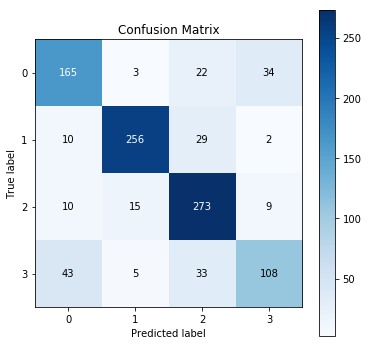

In [22]:
grid_param={'C':[1,5,10,20,50,100],'kernel':['linear']}
clf_svm_linear = GridSearchCV(SVC(kernel='linear'),param_grid=grid_param,cv=5,n_jobs=-1)
clf_svm_linear.fit(X_train, y_train)
predicted_svm_linear = clf_svm_linear.predict(X_test)

accuracy_linear_after = np.mean(predicted_svm_linear == y_test)*100
print("Accuracy : "+str((np.mean(predicted_svm_linear == y_test)*100))) 
print("Confusion Matrix : \n", metrics.confusion_matrix(y_test, predicted_svm_linear))

sciplt.metrics.plot_confusion_matrix(y_test,predicted_svm_linear,figsize=(6,6))

Accuracy : 78.85939036381514
Confusion Matrix : 
 [[165   3  22  34]
 [ 10 256  29   2]
 [ 10  15 273   9]
 [ 43   5  33 108]]


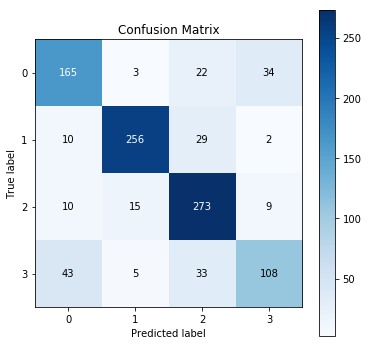

In [23]:
grid_param={'gamma': [1e-2,1e-3,1e-4],'C':[100,500,1000],'kernel':['sigmoid']}
clf_svm_sigmoid = GridSearchCV(SVC(kernel='sigmoid'),param_grid=grid_param,cv=5,n_jobs=-1)
clf_svm_sigmoid.fit(X_train, y_train)
predicted_svm_sigmoid = clf_svm_sigmoid.predict(X_test)

accuracy_sigmoid_after = np.mean(predicted_svm_sigmoid == y_test)*100
print("Accuracy : "+str((np.mean(predicted_svm_sigmoid == y_test)*100))) 
print("Confusion Matrix : \n", metrics.confusion_matrix(y_test, predicted_svm_sigmoid))

sciplt.metrics.plot_confusion_matrix(y_test,predicted_svm_sigmoid,figsize=(6,6))

Accuracy : 78.76106194690266
Confusion Matrix : 
 [[165   4  22  33]
 [ 12 257  25   3]
 [ 11  14 271  11]
 [ 42   6  33 108]]


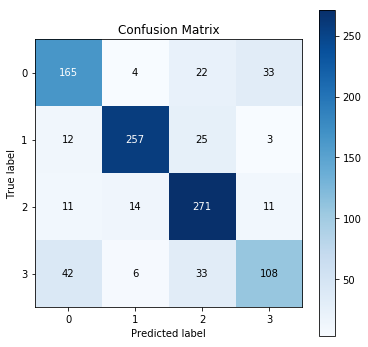

In [24]:
grid_param={'C':[10,100,1000],'gamma':[1e-2,1e-3,1e-4],'kernel':['rbf']}
clf_svm_rbf = GridSearchCV(SVC(kernel='rbf'),param_grid=grid_param,cv=5,n_jobs=-1)
clf_svm_rbf.fit(X_train, y_train)
predicted_svm_rbf = clf_svm_rbf.predict(X_test)

accuracy_rbf_after = np.mean(predicted_svm_rbf == y_test)*100
print("Accuracy : "+str((np.mean(predicted_svm_rbf == y_test)*100))) 
print("Confusion Matrix : \n", metrics.confusion_matrix(y_test, predicted_svm_rbf))

sciplt.metrics.plot_confusion_matrix(y_test,predicted_svm_rbf,figsize=(6,6))

Accuracy : 81.02261553588987
Confusion Matrix : 
 [[172   4  13  35]
 [  5 271  21   0]
 [ 13  19 269   6]
 [ 51   5  21 112]]


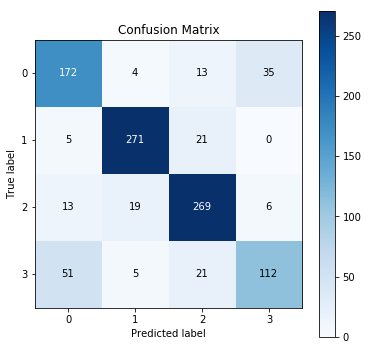

In [25]:
grid_param={'alpha':np.linspace(0.1,2,num=10),'fit_prior':[True,False]}
clf_nb = GridSearchCV(MultinomialNB(),param_grid=grid_param,cv=5,n_jobs=-1)
clf_nb.fit(X_train,y_train)
predicted_nb = clf_nb.predict(X_test)

accuracy_nb_after = np.mean(predicted_nb == y_test)*100
print("Accuracy : "+str((np.mean(predicted_nb == y_test)*100))) 
print("Confusion Matrix : \n", metrics.confusion_matrix(y_test, predicted_nb))

sciplt.metrics.plot_confusion_matrix(y_test,predicted_nb,figsize=(6,6))

#### How does this accuracy compare with that of part c?

The accuracy of SVM kernals are reduced by 3% and remained at nearly 78% for RBF, sigmoid and linear, while the accuracy of Multinomial NB also reduced by 3% and remained at 81.02%. There is no significant decline of accuracy but  the decline of accuracy is mainly due to decrease in size of vocabulary. The vocabulary for part-c was 20732. After extracting noun data the vocabulary remained at 14549. The vocabulary measure is mentioned following this section. 

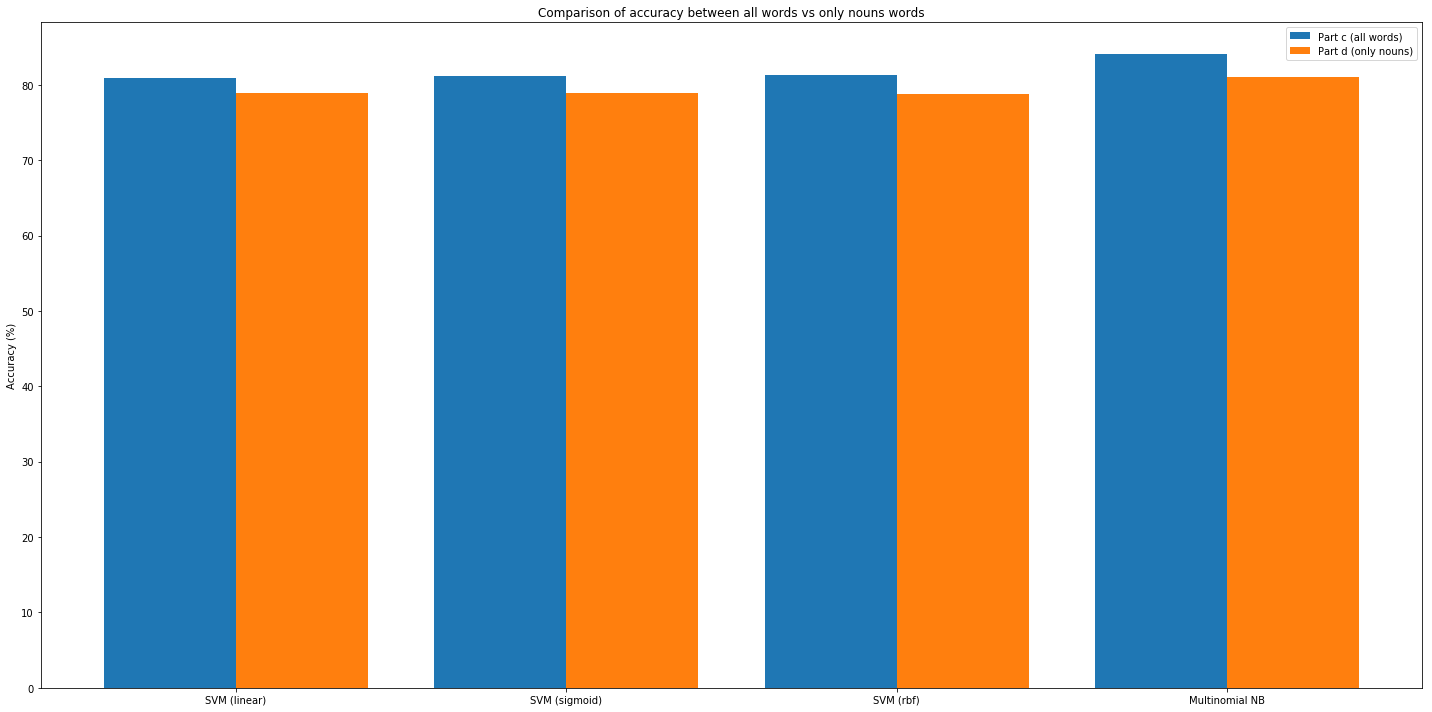

In [26]:
#plot to compare accuracy of dataset with all words vs dataset with on noun words
before_data  = (accuracy_linear_before, accuracy_sigmoid_before, accuracy_rbf_before,accuracy_nb_before)
after_data = (accuracy_linear_after, accuracy_sigmoid_after, accuracy_rbf_after,accuracy_nb_after)

ind = np.arange(len(before_data)) 


width = 0.4
fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(ind - width/2, before_data, width,label='Part c (all words)')
rects2 = ax.bar(ind + width/2, after_data, width,label='Part d (only nouns)')


ax.set_ylabel('Accuracy (%)')
ax.set_title('Comparison of accuracy between all words vs only nouns words')
ax.set_xticks(ind)
ax.set_xticklabels(('SVM (linear)', 'SVM (sigmoid)', 'SVM (rbf)', 'Multinomial NB'))
ax.legend()


fig.tight_layout()

plt.show()

#### How does the size of the vocabulary compare with that of part (c)?

In part c, vocabulary size was 20732 words whereas in part d after extracting only nouns, vocabulary remained at 14549 words.

In [27]:
print("Size of Vocabulary for part c) "+str(sizeOfVocabularyBefore))
print("Size of Vocabulary for part d) "+str(sizeOfVocabularyAfter))

Size of Vocabulary for part c) 20732
Size of Vocabulary for part d) 14549


### References

[1] S. Wang and M. D. Christopher, “Baselines and Bigrams: Simple, Good Sentiment and Topic ...” [Online]. Available:   https://nlp.stanford.edu/pubs/sidaw12_simple_sentiment.pdf.

[2] “RBF SVM parameters” scikit. [Online]. Available: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html.

[3] “sklearn.naive_bayes.MultinomialNB,” scikit. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html.

[4] “Grouped bar chart with labels,” Grouped bar chart with labels - Matplotlib 3.1.1 documentation. [Online]. Available: https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py.

[5] S. Rezaeipour, “CSCI3151 : Collocation - Tutorial - 6.” [Online]. Available: https://colab.research.google.com/drive/17LMCbDOnny8h1KTqqoX3smy6US6z1vki#scrollTo=_SJyIl6is2tx.

[6] S. Rezaeipour, “CSCI3151 : Lab6 _ Text Processing” [Online]. Available: https://dal.brightspace.com/d2l/le/content/98749/viewContent/1340763/View

[7] “sklearn.model_selection.GridSearchCV,” scikit. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

[8] “sklearn.svm.SVC,” scikit. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html.